# Does Classification Play A Major Role In Determining The Annual Income Of An Adult Worker?

## Importing and loading data, and initial visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.project_functions import *

In [3]:
df = load_and_process("../../data/raw/adult.data")
df.head()

,Age,Workclass,Final Weight,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Salary
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Grouping like values together

Group together like workclasses into several more specific groups:

In [4]:
find_and_replace(df, 'Workclass', 'State-gov|Federal-gov|Local-gov', 'Government')
find_and_replace(df, 'Workclass', 'Never-worked|Without-pay|Other', '?')
find_and_replace(df, 'Workclass', 'Self-emp-not-inc|Self-emp-inc', 'Self-employed')
find_and_replace(df, 'Workclass', '?', 'Other')

Group together similar educations:

In [5]:
find_and_replace(df, 'Education', '11th|9th|7th-8th|5th-6th|10th|1st-4th|12th|Preschool|Replaced', 'Didnt-grad-HS')
find_and_replace(df, 'Education', 'Some-college', 'Bachelors')

Group together married people into several more defined groups:

In [7]:
find_and_replace(df, 'Marital Status', 'Married-spouse-absent', 'Married-civ-spouse')
find_and_replace(df, 'Marital Status', 'Married-AF-spouse', 'Married-civ-spouse')
find_and_replace(df, 'Marital Status', 'Married-civ-spouse', 'Married')

Group together like occupations:

In [8]:
find_and_replace(df, 'Occupation', '?', 'Other')
find_and_replace(df, 'Occupation', 'Other-service', 'Other')
find_and_replace(df, 'Occupation', 'Armed-Forces', 'Protective-serv')

Here we can group together salary and education so we can visualize how many are in each category:

In [5]:
grouped=df.groupby(['Workclass','Salary']).size()
grouped

Workclass       Salary
 Government      <=50K     3010
                 >50K      1341
 Other           <=50K     1666
                 >50K       191
 Private         <=50K    17733
                 >50K      4963
 Self-employed   <=50K     2311
                 >50K      1346
dtype: int64

## Initial visualizations

Text(0.5, 1.0, 'Salary of Different Workclasses')

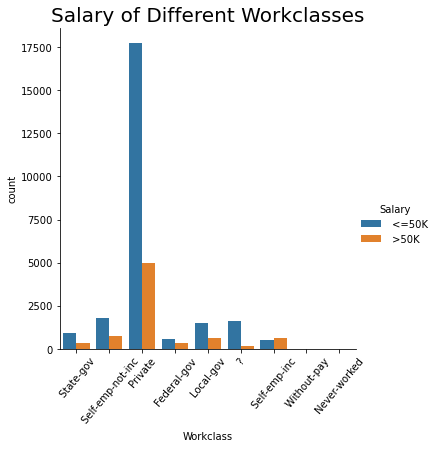

In [9]:
sns.catplot(
    x="Workclass",
    hue="Salary",
    kind="count",
    data=df,
    ).set_xticklabels(rotation=50)
plt.title("Salary of Different Workclasses", size=20)

### Analysis
From this visualization above we can see some interesting inormation. We are able to see that if you want to have a salary of >50k it would be best to be self-employed. As well we are able to see that the majority of the working force is people working for private companies. As well that no matter what working class you may be in, there may be a potential to have a salary >50k according to our data.

Text(0.5, 1.0, 'The distribution of Salary by Education')

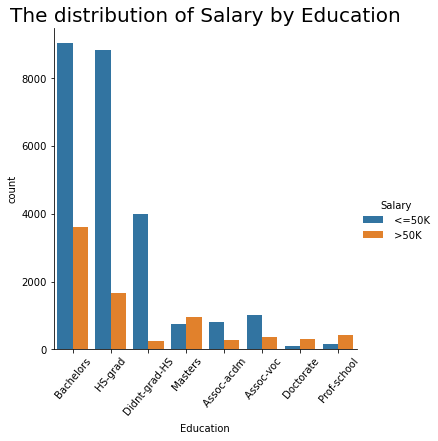

In [34]:
sns.catplot(
    x="Education",
    hue="Salary",
    kind="count",
    data=df
    ).set_xticklabels(rotation=50)
plt.title("The distribution of Salary by Education", size=20)

### Analysis
Here we could see that almost any education level will have an income lower than 50  thousand dollars. Only high level of education such as masters and so on have a majority of having an annual salary of more than 50 thousand dollars. However, as we could see , the amount of people who are at this level of education is relatively small. Hence, it is safe to assume that it is harder for people to achieve a higher education resulting in a higher income for those who do have higher education.

Text(0.5, 1.0, "Dividing Salary by Different Marital Status'")

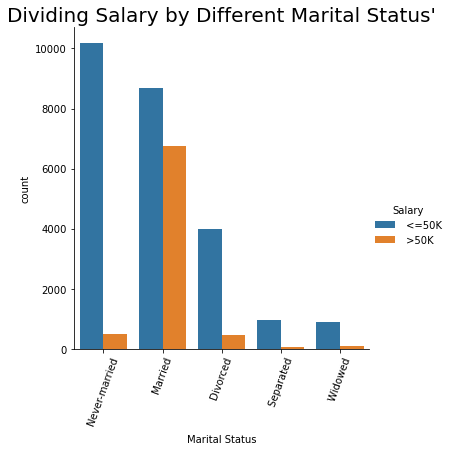

In [35]:
sns.catplot(
    x="Marital Status",
    hue="Salary",
    kind="count",
    data=df
    ).set_xticklabels(rotation=70)
plt.title("Dividing Salary by Different Marital Status'", size=20)

### Analysis
Here we could see the distribution of salary base on marital status of people. It is clear that for all type of relationship, will have a majority of lower income people (less or equal than 50 thousand dollars). However, the gorup of people that are already married or have a spouse have the most people with more than 50 thousand income.

Text(0.5, 1.0, '')

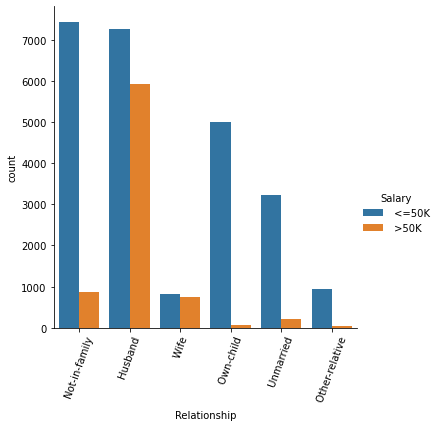

In [26]:
sns.catplot(
    x="Relationship",
    hue="Salary",
    kind="count",
    data=df
    ).set_xticklabels(rotation=70)
plt.title("")

This visualization aids the previous graph by giving a more detail explanation. 

Text(0.5, 1.0, 'Dividing Salary by Different Occupations')

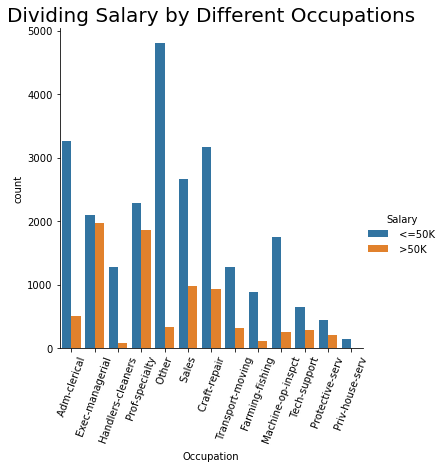

In [36]:
sns.catplot(
    x="Occupation",
    hue="Salary",
    kind="count",
    data=df,
    ).set_xticklabels(rotation=70)
plt.title("Dividing Salary by Different Occupations", size=20)

### Analysis
All of type of occupation has a majority of people with lower income than 50 thousand dollars. However, the difference between the salary as an Executive-managerial and Prof-speciality is relatively much smaller than the other jobs.

Text(0.5, 1.0, 'Salaries Divided by Different Race Categories')

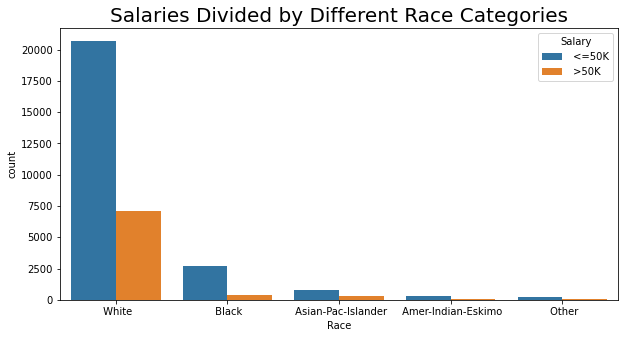

In [33]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x="Race", hue="Salary", data=df)
plt.title("Salaries Divided by Different Race Categories", size=20)

### Analysis
There is no direct correlation between race and the salary. All races seem to be dominated by <=50K salaries, and for some there may be inaccuracies due to small sample sizes.

Text(0.5, 1.0, 'Dividing Salary by Sex')

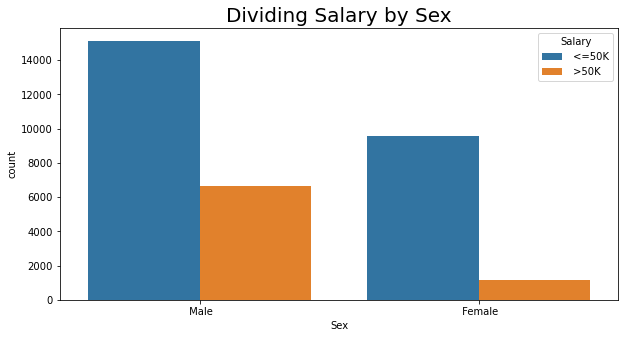

In [14]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x="Sex", hue="Salary", data=df)
plt.title("Dividing Salary by Sex",size=20)

### Analysis
Although both sexes has a majority of people with less than 50 thousand annual income. However, the percentage of female with higher than 50 thousand dollars income is much smaller than their male counterpart

Text(0.5, 1.0, 'Comparing the Different Salaries by the Hours Per Week')

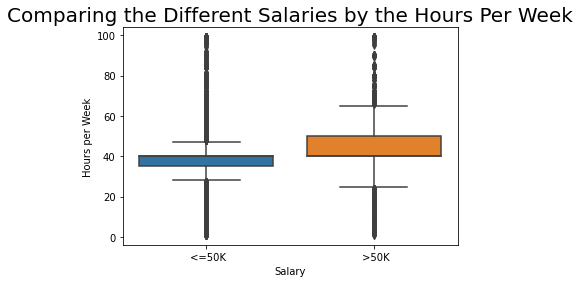

In [38]:
sns.boxplot(x='Salary', y='Hours per Week', data=df)
plt.title("Comparing the Different Salaries by the Hours Per Week", size=20)

### Analysis
There is no direct correlation between the amount of hours per week working with salaries. All of the different hours have the majority people of having less than 50 thousand dollars in annual income. However, the gap between the difference seems to be relatively smaller for those who worked in 50 and 60 hours per week.

# Conclusion
From all the given variables, we determined that those who have a higher education than bachelors such as master, doctorates and Prof - school seems to have a higher probability to have an income higher than 50 thousand dollars yearly.